In [1]:
import os
import sys

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

from transformers import PreTrainedTokenizerFast

sys.path.append(os.path.abspath("../src"))
# from utils import (
#     load_flores_dataset,
# )

c:\Users\ah140\anaconda3_\envs\AdvancedNLP_DL\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
TOKENIZER_MODELS = ["BPE", "WordPiece", "Unigram"]
VOCAB_SIZES = [10000, 20000, 30000, 40000]
LANGUAGES = ["es", "tr"]
EVAL_DATASETS = ["flores", "massive"]

results_path = "../results/"

### Fertility

Dataset: FLORES


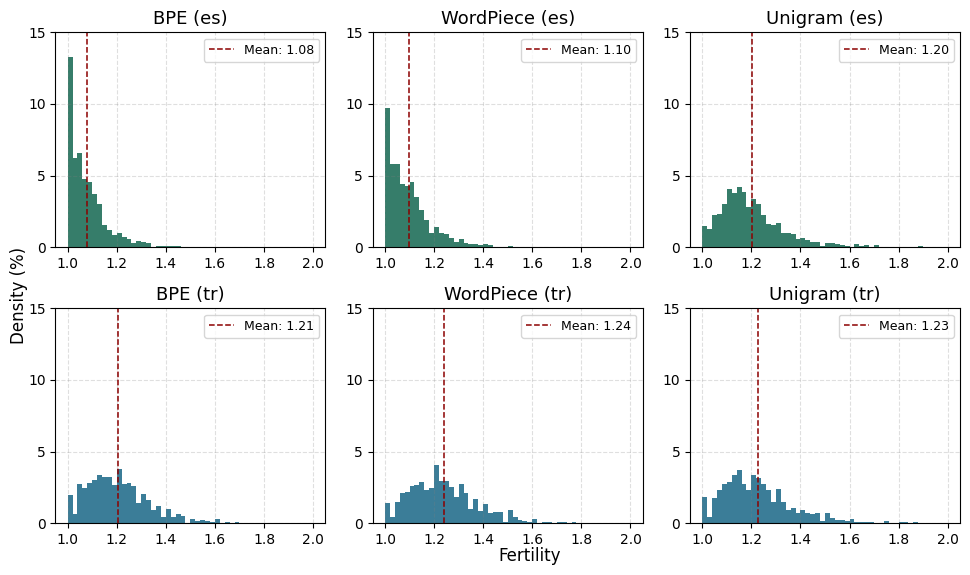

Dataset: MASSIVE


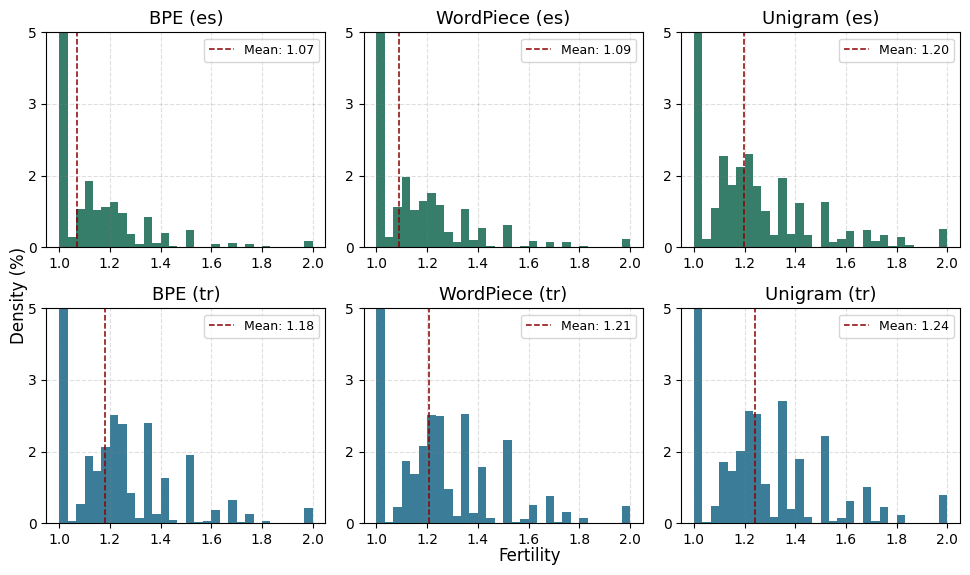

In [ ]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')

    fig, axes = plt.subplots(len(LANGUAGES), len(TOKENIZER_MODELS), figsize=(10, 6))  # Adjust the figure size for clarity
    
    for model_idx, model_name in enumerate(TOKENIZER_MODELS):
        for lang_idx, language in enumerate(LANGUAGES):
            ax = axes[lang_idx, model_idx] if len(TOKENIZER_MODELS) > 1 else axes[lang_idx]  # Adjust axes indexing
            
            results_fertility_path = os.path.join(results_path, f'{language}_{model_name}_vs40000/eval_metrics_{dataset_name}.json')
            with open(results_fertility_path) as f:
                results_dict = json.load(f)

            # Set color based on language
            if language == 'es':
                color_l = "#367D6A"
            elif language == 'tr':
                color_l = "#3B7D98"

            ax.grid(True, linestyle='--', color='gray', alpha=0.25)

            # Annotate mean fertility
            fertility_data = results_dict['fertility']
            mean_fertility = np.mean(fertility_data)  # Calculate the mean
            ax.axvline(mean_fertility, color='darkred', linestyle='--', linewidth=1.1, label=f"Mean: {mean_fertility:.2f}")
            ax.legend(fontsize=9)

            # Adjust y-axis limits and bins
            if dataset_name == "flores":
                y_min, y_max = (0, 16)
                ax.set_ylim(0, 0.16)
                bins_d = 50
            else:
                y_min, y_max = (0, 40)
                ax.set_ylim(0, 0.4)
                bins_d = 30

            y_ticks = np.linspace(y_min, y_max, 4)  # Generate 4 evenly spaced ticks
            ax.hist(fertility_data, bins=bins_d, range=(1, 2), density=True, color=color_l)
            ax.set_yticks(y_ticks)  # Set the ticks
            ax.set_yticklabels([f'{tick:.0f}' for tick in y_ticks])  # Format the tick labels

            ax.set_title(f'{model_name} ({language})', fontsize=13)

    # Adjust layout for the figure
    fig.supxlabel('Fertility', fontsize=12, y=0.05, x=0.55)
    fig.supylabel('Density (%)', fontsize=12, x=0.03)
    plt.tight_layout()  # Adjust layout to include title

    # Save the figure if needed
    plt.savefig(f'../figures/newfertility_{dataset_name}.svg', format='svg')

    plt.show()  # Show the figure
    plt.close()  # Close the figure after displaying

### Parity

Dataset: FLORES
BPE gave the highest parity of 2.36 with index 1820
WordPiece gave the highest parity of 2.42 with index 963
Unigram gave the highest parity of 3.43 with index 236


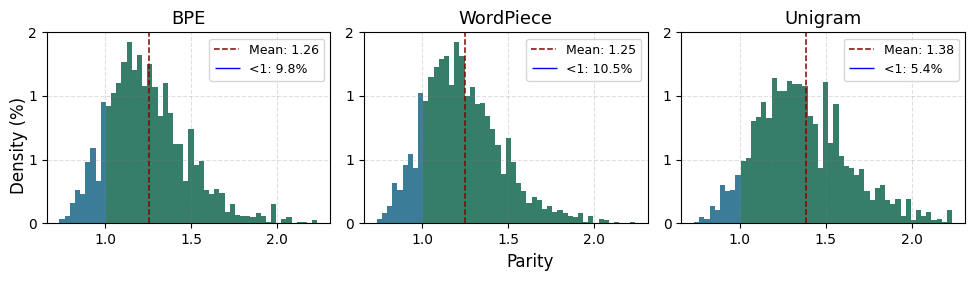

Dataset: MASSIVE
BPE gave the highest parity of 4.00 with index 6876
WordPiece gave the highest parity of 4.00 with index 6876
Unigram gave the highest parity of 7.00 with index 15083


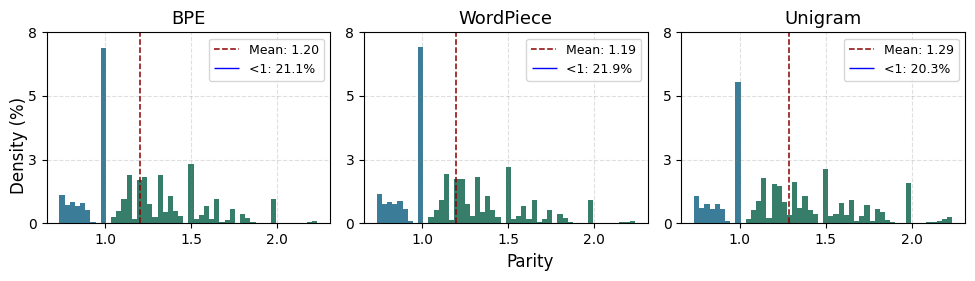

In [6]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    axes = axes.flatten()
    for i, model_name in enumerate(TOKENIZER_MODELS):
        results_parity_path = os.path.join(results_path, f'tr_{model_name}_vs40000/parity_{dataset_name}.json')
        with open(results_parity_path) as f:
            results_dict = json.load(f)

        # Track the data point with the highest parity
        max_parity = max(results_dict['parity'])
        idx = np.argmax(results_dict['parity'])
        print(f'{model_name} gave the highest parity of {max_parity:.2f} with index {idx}')
        
        # Calculate histogram data
        bin_edges = np.linspace(0.75, 2.25, 50 + 1)
        counts, edges = np.histogram(results_dict['parity'], bins=bin_edges, density=True)

        colors = ["#3B7D98" if (edge < 1) else "#367D6A" for edge in edges[:-1]]   ##367D6A

        # Plot the histogram using bar to allow custom colors
        axes[i].bar(edges[:-1], counts, width=0.03, color=colors)
        axes[i].set_title(f"{model_name}", fontsize=13)
        axes[i].grid(True, linestyle='--', color='gray', alpha=0.25)
        
        below_one = np.sum(np.array(results_dict['parity']) < 1) / len(results_dict['parity']) * 100
        
        mean_parity = np.mean(results_dict['parity'])  # Calculate the mean
        axes[i].axvline(mean_parity, color='darkred', linestyle='--', linewidth=1.1, label=f"Mean: {mean_parity:.2f}")
        
        axes[i].legend(
            handles=[
                plt.Line2D([0], [0], color='darkred', linestyle='--', linewidth=1.1),  # Line for mean
                plt.Line2D([0], [0], marker='_', color="blue", linestyle='None', markersize=18)  # Green par symbol for below 1 percentage
            ],
            labels=[f"Mean: {mean_parity:.2f}", f"<1: {below_one:.1f}%"],
            fontsize=9,
            loc='upper right'
        )
        
        if dataset_name == "flores":
            ymin, y_max = 0, 2.2
        else:
            ymin, y_max = 0, 8
        axes[i].set_ylim(ymin, y_max)
        
        # Generate and set y-axis ticks
        y_ticks = np.linspace(ymin, y_max, 4)  # Generate 4 evenly spaced ticks
        axes[i].set_yticks(y_ticks)  # Set the ticks
        axes[i].set_yticklabels([f'{tick:.0f}' for tick in y_ticks])  # Format the tick labels  

        # Add shared x and y-axis labels
        fig.supxlabel('Parity', fontsize=12, y=0.08, x=0.55)
        fig.supylabel('Density (%)', fontsize=12, x=0.03)

    plt.tight_layout()
    # Save the figure as an SVG file
    plt.savefig(f'../figures/newparity_{dataset_name}.svg')
    plt.show()

In [209]:
flores_es = load_flores_dataset('es')
flores_tr = load_flores_dataset('tr')

text_es = flores_es['text'][236]
text_tr = flores_tr['text'][236]

print('\n')
print(f'Spanish text: {text_es}')
print(f'Turkish text: {text_tr}')

Using the latest cached version of the dataset since openlanguagedata/flores_plus couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/eisukeokuda/.cache/huggingface/datasets/openlanguagedata___flores_plus/default/0.0.0/00748651fbd725985ead0c8c21046b41737c99bd (last modified on Sun Dec 15 16:20:42 2024).
Using the latest cached version of the dataset since openlanguagedata/flores_plus couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/eisukeokuda/.cache/huggingface/datasets/openlanguagedata___flores_plus/default/0.0.0/00748651fbd725985ead0c8c21046b41737c99bd (last modified on Sun Dec 15 16:20:42 2024).




Spanish text: se comportará igual que el agua. es transparente, tal como lo es el agua.
Turkish text: suya benzer şekilde saydam davranış sergileyecek.


### Productivity

Dataset: FLORES


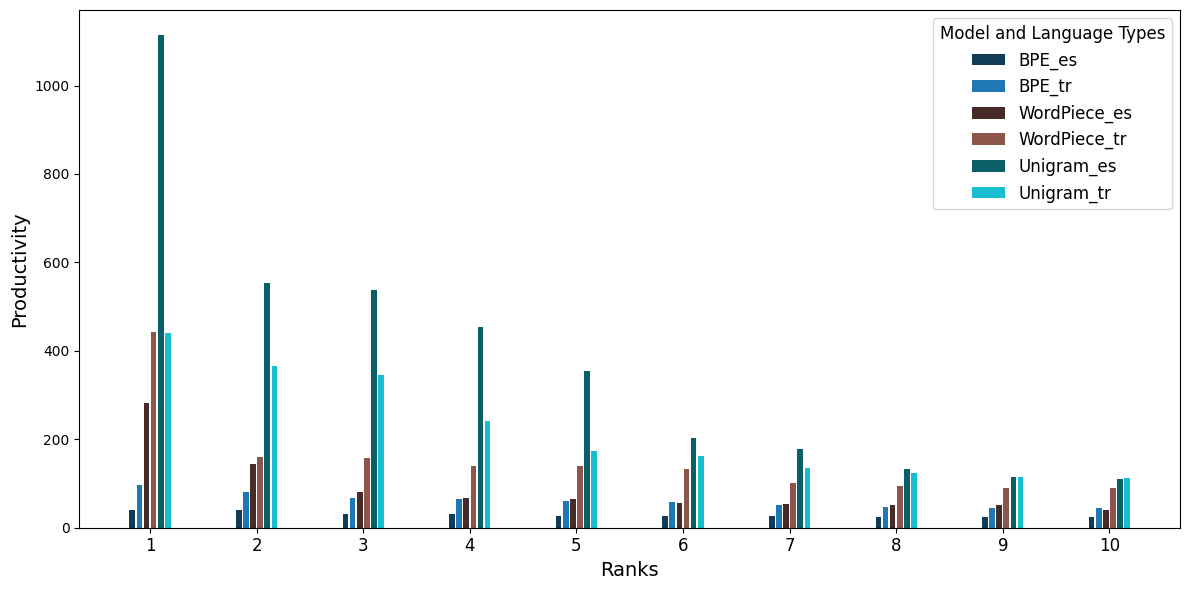

Dataset: MASSIVE


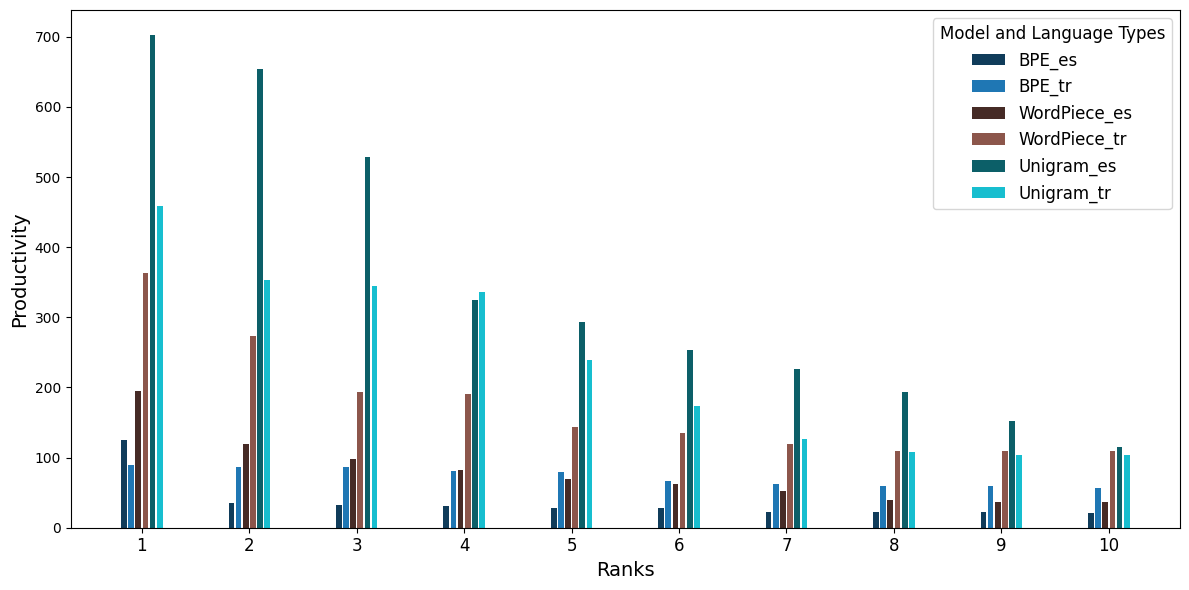

In [119]:
language_shades = {'tr': 1, 'es': 0.5}
colors = plt.cm.tab10(np.linspace(0, 1, len(TOKENIZER_MODELS)))
model_colors = {model_name: color for model_name, color in zip(TOKENIZER_MODELS, colors)}

color_dict = {}
for model_name in TOKENIZER_MODELS:
    for language in LANGUAGES:
        shade = language_shades[language]
        color = mcolors.to_rgb(model_colors[model_name])
        adjusted_color = tuple([c * shade for c in color])

        color_dict[(language, model_name)] = adjusted_color

ranks = np.arange(1, 11)  # Rankings from 1 to 10
bar_width = 0.2 / len(TOKENIZER_MODELS)

for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    plt.figure(figsize=(12, 6))
    for i, (language, model_name) in enumerate(color_dict.keys()):
        results_productivity_path = os.path.join(results_path, f'{language}_{model_name}_vs40000/productivity_{dataset_name}.json')
        with open(results_productivity_path) as f:
            results_dict = json.load(f)
        
        top10_values = sorted(results_dict.values(), reverse=True)[:10]

        plt.bar(ranks-0.1 + i * bar_width, top10_values, width=bar_width*0.8, 
            label=f'{model_name}_{language}', color=color_dict[(language, model_name)])

    plt.xlabel('Ranks', fontsize=14)
    plt.ylabel('Productivity', fontsize=14)

    plt.xticks(ranks + bar_width * (len(TOKENIZER_MODELS) - 1) / 2, ranks, fontsize=12)

    model_patches = [Patch(facecolor=color_dict[(language, model_name)], label=f'{model_name}_{language}') for (language, model_name) in color_dict.keys()]

    plt.legend(handles=model_patches, title='Model and Language Types', loc='upper right', fontsize=12, title_fontsize=12)

    plt.tight_layout()

    # Save the figure as an SVG file
    #plt.savefig(f'../figures/productivity_rank_{dataset_name}.svg')
    plt.show()

Dataset: FLORES


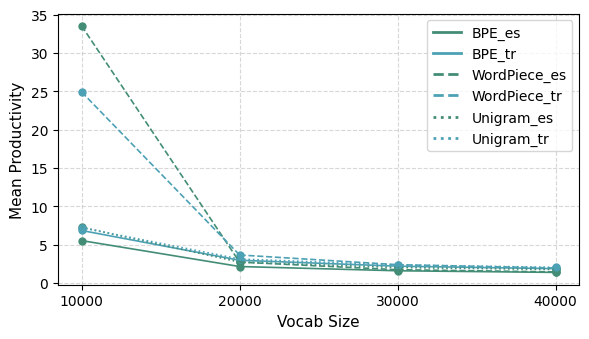

Dataset: MASSIVE


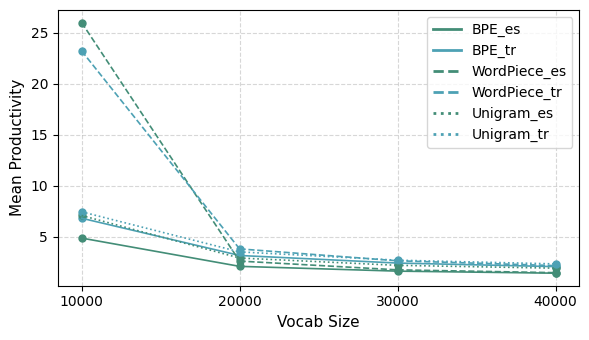

In [153]:
from matplotlib.lines import Line2D  # For custom legend handles

# Define single colors per language and linestyles for models
language_colors = {
    'es': "#438D77",  # Green for Spanish
    'tr': "#4DA1B4",  # Blue for Turkish
    # Add more languages if needed
}

model_linestyles = {
    'BPE': '-',  # Dashed line for BPE model
    'WordPiece': '--',  # Dash-dot line for WordPiece model
    'Unigram': ':',   # Solid line for Unigram model
    # Add more models if needed
}

for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    plt.figure(figsize=(6, 3.5))

    # Create a dictionary to store productivity values
    productivity_dict = {}
    for (language, model_name) in color_dict.keys():
        productivity_dict[(language, model_name)] = []

    for i, (language, model_name) in enumerate(color_dict.keys()):
        for vocab_size in VOCAB_SIZES:
            results_productivity_path = os.path.join(results_path, f'{language}_{model_name}_vs{vocab_size}/productivity_{dataset_name}.json')
            with open(results_productivity_path) as f:
                results_dict = json.load(f)

            avg_productivity = sum(results_dict.values()) / len(results_dict)
            productivity_dict[(language, model_name)].append(avg_productivity)
            
            # Use the appropriate color and linestyle
            color = language_colors[language]  # Use the single color for the language
            linestyle = model_linestyles.get(model_name, '-')
            
            plt.plot(
                vocab_size,
                avg_productivity,
                label=f'{model_name}_{language}',
                color=color,
                marker='o',
                linestyle=linestyle,  # Apply linestyle
                linewidth=1.2,
                markersize=5,
            )

    # Plot the lines connecting the points with different linestyles for each model
    for (language, model_name) in color_dict.keys():
        for i in range(3):
            linestyle = model_linestyles.get(model_name, '-')
            color = language_colors[language]  # Use the single color for the language

            plt.plot(
                [VOCAB_SIZES[i], VOCAB_SIZES[i+1]],
                [productivity_dict[(language, model_name)][i], productivity_dict[(language, model_name)][i+1]],
                color=color,
                linestyle=linestyle,  # Apply linestyle
                linewidth=1.2
            )
    
    # Labels and legend
    plt.xlabel('Vocab Size', fontsize=11)
    plt.ylabel('Mean Productivity', fontsize=11)

    # Create custom legend handles with both color and linestyle
    legend_handles = []
    for (language, model_name) in color_dict.keys():
        color = language_colors[language]  # Get the color for the language
        linestyle = model_linestyles.get(model_name, '-')  # Get the linestyle for the model
        
        # Create a Line2D object for the legend with the correct color and linestyle
        legend_handles.append(Line2D([0], [0], color=color, linestyle=linestyle, linewidth=2, label=f'{model_name}_{language}'))

    plt.legend(handles=legend_handles, loc='upper right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(VOCAB_SIZES)  # Ensure all vocab sizes are shown on the x-axis
    plt.tight_layout()

    # Uncomment this line to save the plot
    plt.savefig(f'../figures/newavg_productivity_{dataset_name}.svg')

    plt.show()


Dataset: FLORES


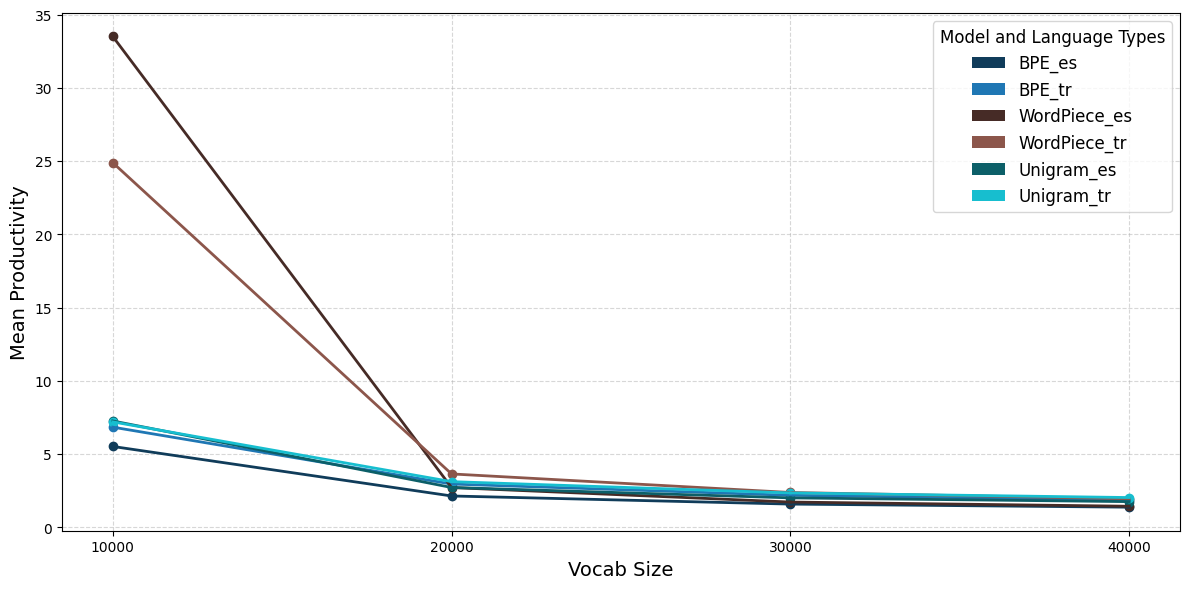

Dataset: MASSIVE


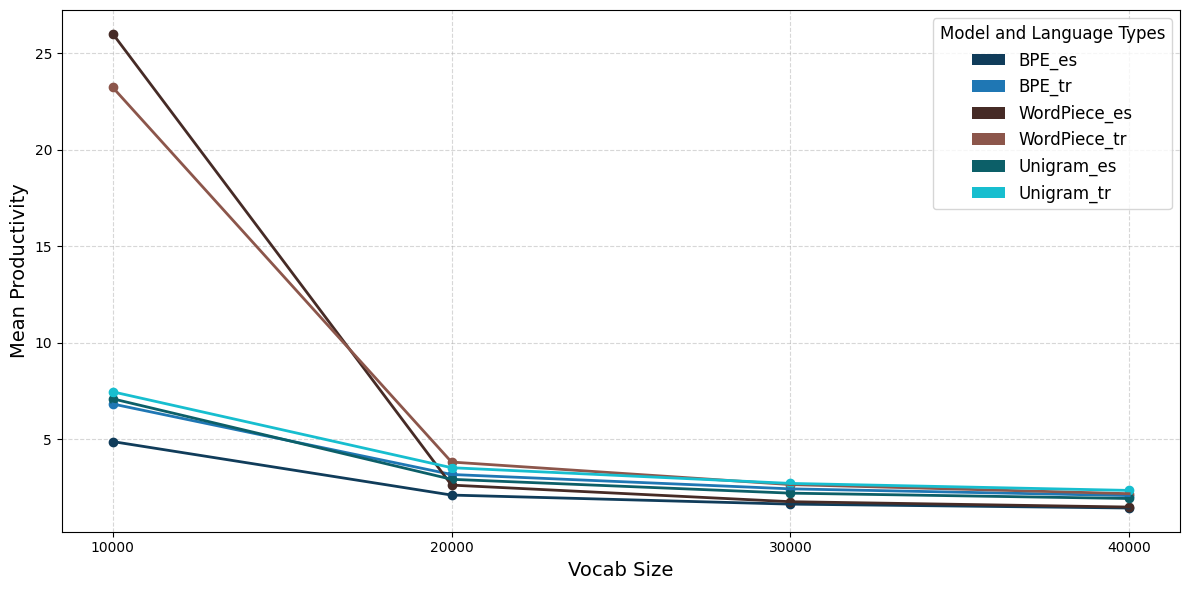

In [22]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    plt.figure(figsize=(12, 6))

    productivity_dict = {}
    for (language, model_name) in color_dict.keys():
        productivity_dict[(language, model_name)] = []

    for i, (language, model_name) in enumerate(color_dict.keys()):
        for vocab_size in VOCAB_SIZES:
            results_productivity_path = os.path.join(results_path, f'{language}_{model_name}_vs{vocab_size}/productivity_{dataset_name}.json')
            with open(results_productivity_path) as f:
                results_dict = json.load(f)

            avg_productivity = sum(results_dict.values())/len(results_dict)
            productivity_dict[(language, model_name)].append(avg_productivity)
            
            plt.plot(
            vocab_size,
            avg_productivity,
            label=f'{model_name}_{language}',
            color=color_dict[(language, model_name)],
            marker='o',
            )

    for (language, model_name) in color_dict.keys():
        for i in range(3):
            plt.plot(
                    [VOCAB_SIZES[i], VOCAB_SIZES[i+1]],
                    [productivity_dict[(language, model_name)][i], productivity_dict[(language, model_name)][i+1]],
                    color=color_dict[(language, model_name)],
                    linestyle='-',
                    linewidth=2,
                    )
    
    plt.xlabel('Vocab Size', fontsize=14)
    plt.ylabel('Mean Productivity', fontsize=14)
    model_patches = [Patch(facecolor=color_dict[(language, model_name)], label=f'{model_name}_{language}') for (language, model_name) in color_dict.keys()]
    plt.legend(handles=model_patches, title='Model and Language Types', loc='upper right', fontsize=12, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(VOCAB_SIZES)  # Ensure all vocab sizes are shown on the x-axis
    plt.tight_layout()

    #plt.savefig(f'../figures/avg_productivity_{dataset_name}.svg')
    plt.show()
            

### BPC

In [155]:
bpc_dict

{('es', 'BPE'): [0.5098623652823004,
  0.672268344279233,
  0.7303098982797496,
  0.7403844061765769],
 ('tr', 'BPE'): [0.5440715021005353,
  0.6765904964530739,
  0.7986476459430789,
  0.9267814005021243],
 ('es', 'WordPiece'): [0.22354442044633713,
  0.5863614255826084,
  0.7221542766489607,
  0.7663434228289298],
 ('tr', 'WordPiece'): [0.338698296057729,
  0.6565722086911532,
  0.788760270036019,
  0.9101754583632943],
 ('es', 'Unigram'): [0.5300564057275622,
  0.6893604728610517,
  0.7594413680955617,
  0.7035523785765778],
 ('tr', 'Unigram'): [0.5729214479001907,
  0.6787104545981991,
  0.798427664510626,
  0.8612783433812781]}

Dataset: FLORES


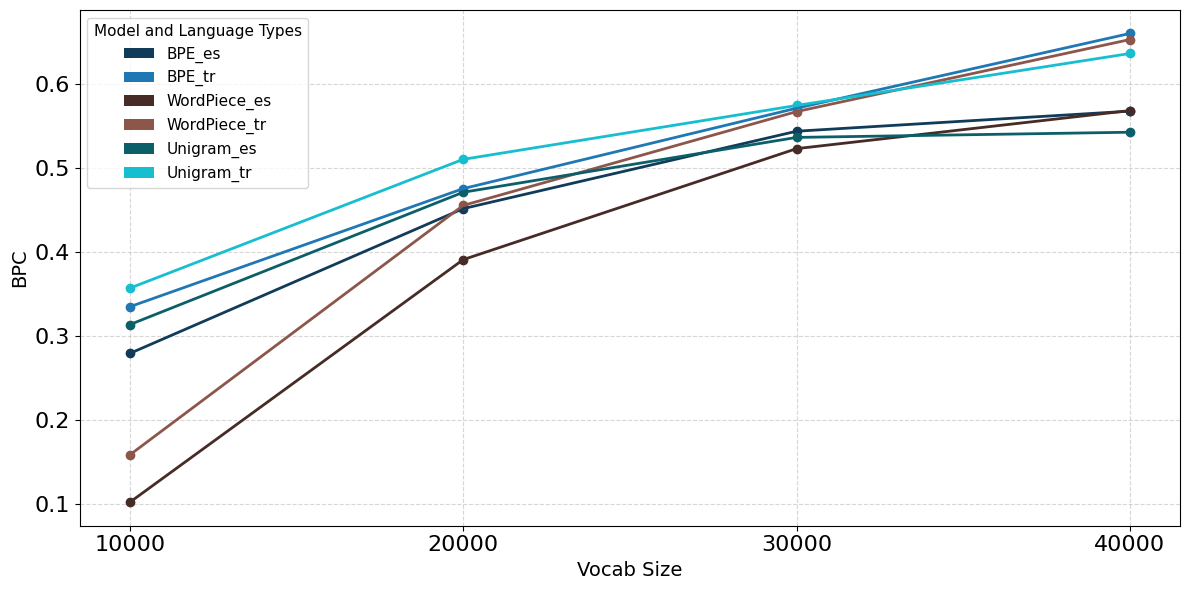

Dataset: MASSIVE


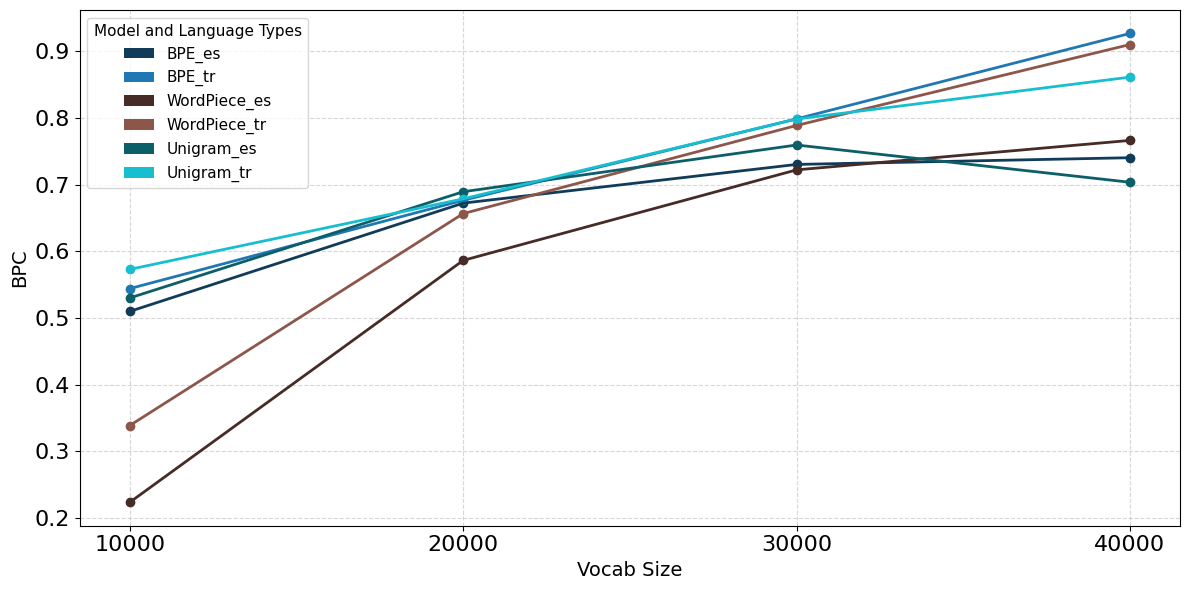

In [154]:
for dataset_name in EVAL_DATASETS:
    print('================================')
    print(f'Dataset: {dataset_name.upper()}')
    print('================================')
    plt.figure(figsize=(12, 6))

    bpc_dict = {}
    for (language, model_name) in color_dict.keys():
        bpc_dict[(language, model_name)] = []

    for i, (language, model_name) in enumerate(color_dict.keys()):
        for vocab_size in VOCAB_SIZES:
            results_bpc_path = os.path.join(results_path, f'{language}_{model_name}_vs{vocab_size}/bpc_{dataset_name}.json')
            with open(results_bpc_path) as f:
                results_dict = json.load(f)

            bpc_dict[(language, model_name)].append(results_dict['bpc'])
            
            plt.plot(
            vocab_size,
            results_dict['bpc'],
            label=f'{model_name}_{language}',
            color=color_dict[(language, model_name)],
            marker='o',
            )

    for (language, model_name) in color_dict.keys():
        for i in range(3):
            plt.plot(
                    [VOCAB_SIZES[i], VOCAB_SIZES[i+1]],
                    [bpc_dict[(language, model_name)][i], bpc_dict[(language, model_name)][i+1]],
                    color=color_dict[(language, model_name)],
                    linestyle='-',
                    linewidth=2,
                    )
    
    plt.xlabel('Vocab Size', fontsize=14)
    plt.ylabel('BPC', fontsize=14)
    model_patches = [Patch(facecolor=color_dict[(language, model_name)], label=f'{model_name}_{language}') for (language, model_name) in color_dict.keys()]
    plt.legend(handles=model_patches, title='Model and Language Types', loc='upper left', fontsize=11, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.yticks(fontsize=16)
    plt.xticks(VOCAB_SIZES, fontsize=16)  # Ensure all vocab sizes are shown on the x-axis
    plt.tight_layout()


    #plt.savefig(f'../figures/bpc_{dataset_name}.svg')
    plt.show()
            

### new F1 score (FYI)

/var/folders/tj/hl1lt9gs7437b5wxt0r22tfc0000gn/T/ipykernel_63631/3872980530.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis').reversed()


Vocab Size: 10000
Model: BPE
F1 0.5-0.6: 81
F1 0.6-0.7: 76
F1 0.7-0.8: 11
F1 0.8-0.9: 2
F1 0.9-1.0: 42
F1 < 0.5: 212
Model: WordPiece
F1 0.5-0.6: 46
F1 0.6-0.7: 33
F1 0.7-0.8: 8
F1 0.8-0.9: 0
F1 0.9-1.0: 4
F1 < 0.5: 91
Model: Unigram
F1 0.5-0.6: 52
F1 0.6-0.7: 59
F1 0.7-0.8: 12
F1 0.8-0.9: 2
F1 0.9-1.0: 41
F1 < 0.5: 166


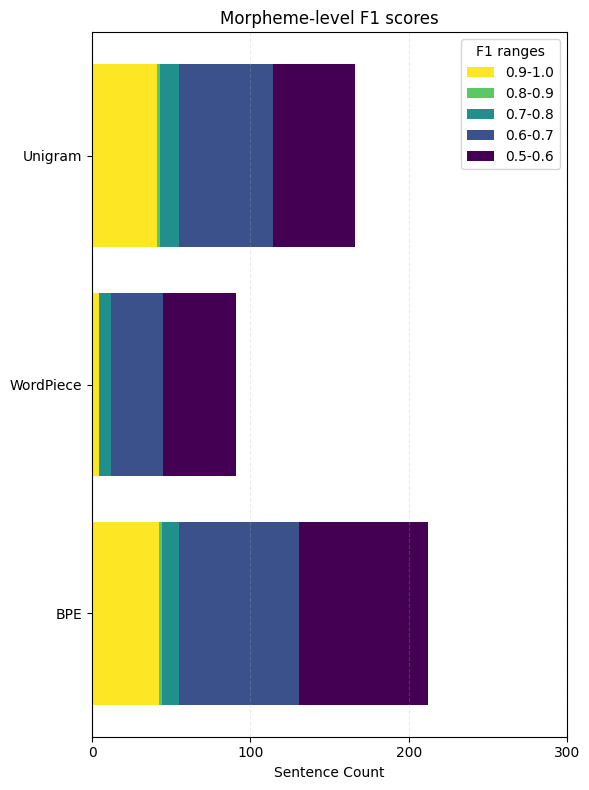

Vocab Size: 40000
Model: BPE
F1 0.5-0.6: 34
F1 0.6-0.7: 88
F1 0.7-0.8: 12
F1 0.8-0.9: 0
F1 0.9-1.0: 228
F1 < 0.5: 362
Model: WordPiece
F1 0.5-0.6: 31
F1 0.6-0.7: 72
F1 0.7-0.8: 4
F1 0.8-0.9: 1
F1 0.9-1.0: 182
F1 < 0.5: 290
Model: Unigram
F1 0.5-0.6: 18
F1 0.6-0.7: 46
F1 0.7-0.8: 5
F1 0.8-0.9: 0
F1 0.9-1.0: 165
F1 < 0.5: 234


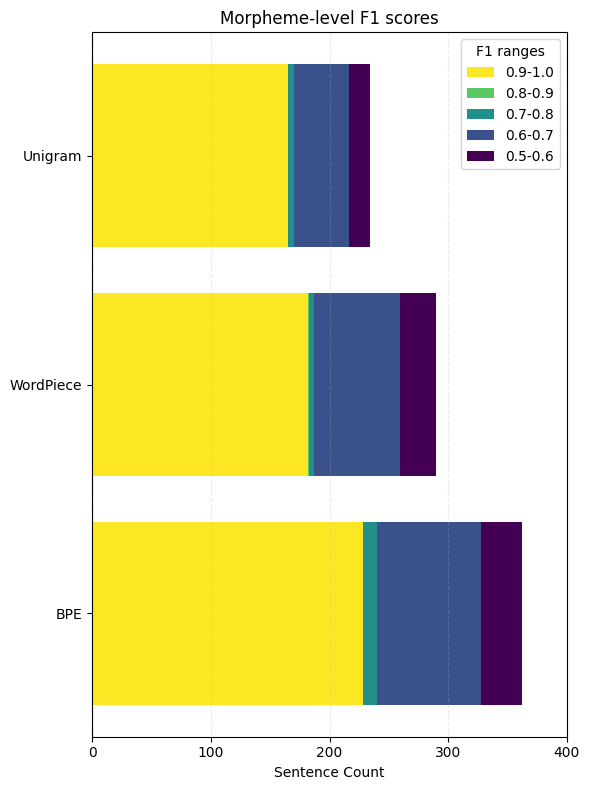

In [60]:
# Create a colormap
cmap = cm.get_cmap('viridis').reversed()
colors = cmap(np.linspace(0, 1, 5)) 

for vocab_size in [10000, 40000]:
    print('================================')
    print(f'Vocab Size: {vocab_size}')
    print('================================')
    fig, ax = plt.subplots(1, 1, figsize=(6, 8))

    f1_score_05 = []
    f1_score_06 = []
    f1_score_07 = []
    f1_score_08 = []
    f1_score_09 = []
    f1_score_05_higher = []

    for model_name in TOKENIZER_MODELS:
        # Load the f1 results
        results_f1_path = os.path.join(results_path, f'tr_{model_name}_vs{vocab_size}/f1_score_new.json')
        with open(results_f1_path) as f:
            results_dict = json.load(f)
        
        f1_05 = 0
        f1_06 = 0
        f1_07 = 0
        f1_08 = 0
        f1_09 = 0

        for f1_score in results_dict['f1_score']:
            if f1_score > 0.9:
                f1_09 += 1
            elif f1_score > 0.8:
                f1_08 += 1
            elif f1_score > 0.7:
                f1_07 += 1
            elif f1_score > 0.6:
                f1_06 += 1
            elif f1_score > 0.5:
                f1_05 += 1

        f1_05_higher= np.sum([f1_05, f1_06, f1_07, f1_08, f1_09], axis=0)

        f1_score_05.append(f1_05)
        f1_score_06.append(f1_06)
        f1_score_07.append(f1_07)
        f1_score_08.append(f1_08)
        f1_score_09.append(f1_09)
        f1_score_05_higher.append(f1_05_higher)

        

        print(f"Model: {model_name}")
        print("F1 0.5-0.6:", f1_05)
        print("F1 0.6-0.7:", f1_06)
        print("F1 0.7-0.8:", f1_07)
        print("F1 0.8-0.9:", f1_08)
        print("F1 0.9-1.0:", f1_09)
        print("F1 < 0.5:", f1_05_higher)

    x_positions = np.arange(len(TOKENIZER_MODELS))

    # Plot a stacked bar graph in the current subplot
    ax.barh(x_positions, f1_score_09, color=colors[0], label='0.9-1.0')
    ax.barh(x_positions, f1_score_08, left=f1_score_09, color=colors[1], label='0.8-0.9')
    ax.barh(x_positions, f1_score_07, left=np.add(f1_score_09, f1_score_08), color=colors[2], label='0.7-0.8')
    ax.barh(x_positions, f1_score_06, left=np.add(np.add(f1_score_09, f1_score_08), f1_score_07), color=colors[3], label='0.6-0.7')
    ax.barh(x_positions, f1_score_05, left=np.add(np.add(np.add(f1_score_09, f1_score_08), f1_score_07), f1_score_06), color=colors[4], label='0.5-0.6')

    # Add the labels and title
    ax.set_yticks(x_positions)
    ax.set_yticklabels(TOKENIZER_MODELS)
    ax.set_xlabel('Sentence Count')
    ax.set_title('Morpheme-level F1 scores')

    # Add gridlines and set x-ticks every 10
    ax.grid(True, axis='x', linestyle='--', alpha=0.25)  # Gridlines only on the x-axis
    max_f1_total = max(f1_score_05_higher)  # Calculate the maximum value for the x-ticks
    ax.set_xticks(np.arange(0, max_f1_total + 100, 100))  # Set x-ticks every 10

    # Add legend for only the first plot
    ax.legend(title='F1 ranges')

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Save the figure with subplots
    #plt.savefig('../figures/f1_scores.svg', bbox_inches='tight')

    # Show the figure
    plt.show()
    plt.close